<h1>Lower Back Pain Classification Algorithm </h1>

<p>This dataset contains the anthropometric measurements of the curvature of the spine to support the model towards a more accurate classification.
<br />
Lower back pain affects around 80% of individuals at some point in their life. If this model becomes robust enough, then these measurements may soon become predictive and treatable measures. 
<br /> 
<a href="http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.471.4845&rep=rep1&type=pdf">This study</a> asserts the validity of the manual goniometer measurements as a valid clinical tool. </p>

In [5]:
import pandas as pd
import numpy as np

# read data into dataset variable
data = pd.read_csv("Dataset_spine.csv")


'''The last column of the dataset names the measurements represented in each column, and doesn't add to our analysis. 
We need to drop this final column, and add the names of measurements to our columns'''
# Take a look the top ten rows of our data set 
data.head(10)

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,0.789993,29.3230,12.0036,10.40462,-1.512209,9.6548,Abnormal,Attribute1 = pelvic_incidence (numeric)
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,0.198920,13.8514,10.7146,11.37832,-20.510434,25.9477,Abnormal,Attribute2 = pelvic_tilt (numeric)
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,0.131973,28.8165,7.7676,7.60961,-25.111459,26.3543,Abnormal,Attribute3 = lumbar_lordosis_angle (numeric)
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,0.190408,22.7085,11.4234,10.59188,-20.020075,40.0276,Abnormal,Attribute4 = sacral_slope (numeric)
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,0.367700,26.2011,8.7380,14.91416,-1.702097,21.4320,Abnormal,Attribute5 = pelvic_radius (numeric)


In [6]:
# Drop the unnamed column in place (not a copy of the original)
data.drop('Unnamed: 13', axis=1, inplace=True)

"""We can also see the data we are trying to predict, back pain or not, is labelled categorically (abnormal or normal).
We need to replace these labels with a numeric value for our analysis to work"""
pd.get_dummies(data['Class_att'])

#Adding our newly created columns into the original dataframe
data = pd.concat([data, pd.get_dummies(data['Class_att'])], axis=1)
# We now have three back pain lables, categorical, abnormal and normal. We only need one 
data.drop(['Class_att','Normal'], axis=1, inplace=True)

#we can now name our columns
data.columns = ['Pelvic Incidence','Pelvic Tilt','Lumbar Lordosis Angle','Sacral Slope','Pelvic Radius', 
                'Spondylolisthesis Degree', 'Pelvic Slope', 'Direct Tilt', 'Thoracic Slope', 
                'Cervical Tilt','Sacrum Angle', 'Scoliosis Slope','Outcome']
data.head(10)





,Pelvic Incidence,Pelvic Tilt,Lumbar Lordosis Angle,Sacral Slope,Pelvic Radius,Spondylolisthesis Degree,Pelvic Slope,Direct Tilt,Thoracic Slope,Cervical Tilt,Sacrum Angle,Scoliosis Slope,Outcome
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,1
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,0.789993,29.3230,12.0036,10.40462,-1.512209,9.6548,1
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,0.198920,13.8514,10.7146,11.37832,-20.510434,25.9477,1
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,0.131973,28.8165,7.7676,7.60961,-25.111459,26.3543,1
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,0.190408,22.7085,11.4234,10.59188,-20.020075,40.0276,1
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,0.367700,26.2011,8.7380,14.91416,-1.702097,21.4320,1


<h1>Exploratory Data Analysis </h1>

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
# So plots are displayed directly below the code cell that produced it
%matplotlib inline

In [8]:
data.describe()

,Pelvic Incidence,Pelvic Tilt,Lumbar Lordosis Angle,Sacral Slope,Pelvic Radius,Spondylolisthesis Degree,Pelvic Slope,Direct Tilt,Thoracic Slope,Cervical Tilt,Sacrum Angle,Scoliosis Slope,Outcome
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981,0.677419
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558,0.468220
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900,0.000000
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075,0.000000
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950,1.000000
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600,1.000000
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200,1.000000


In [9]:
#gives each  of those with and without back pain
data["Outcome"].value_counts()

1    210
0    100
Name: Outcome, dtype: int64

In [10]:
backpain = data[data["Outcome"]== 1]
backpain.describe()



,Pelvic Incidence,Pelvic Tilt,Lumbar Lordosis Angle,Sacral Slope,Pelvic Radius,Spondylolisthesis Degree,Pelvic Slope,Direct Tilt,Thoracic Slope,Cervical Tilt,Sacrum Angle,Scoliosis Slope,Outcome
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.0
mean,64.692562,19.791111,55.925370,44.901450,115.077713,37.777705,0.483979,21.085875,12.948913,12.132737,-13.826677,25.146915,1.0
std,17.662129,10.515871,19.669471,14.515560,14.090605,40.696741,0.286319,8.550365,3.516762,2.848401,12.029824,10.242513,0.0
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-10.675871,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900,1.0
25%,50.102507,13.048130,41.116964,34.380345,107.309280,7.263227,0.250212,13.054400,10.151175,9.801870,-23.732086,16.900900,1.0
50%,65.274888,18.798899,56.150000,44.639597,115.650323,31.946516,0.501280,21.750600,12.770050,11.973735,-14.892070,24.509400,1.0
75%,77.593672,24.815515,68.102805,55.146868,123.133365,55.371614,0.708476,28.194975,15.950475,14.609660,-2.937706,33.204375,1.0
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.868423,44.233800,1.0


In [11]:
noBackPain = data[data["Outcome"]==0]
noBackPain.describe()

,Pelvic Incidence,Pelvic Tilt,Lumbar Lordosis Angle,Sacral Slope,Pelvic Radius,Spondylolisthesis Degree,Pelvic Slope,Direct Tilt,Thoracic Slope,Cervical Tilt,Sacrum Angle,Scoliosis Slope,Outcome
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0
mean,51.685244,12.821414,43.542605,38.863830,123.890834,2.186572,0.449880,21.816394,13.307268,11.514534,-14.528711,26.694019,0.0
std,12.368161,6.778503,12.361388,9.624004,9.014246,6.307483,0.284711,8.846484,3.142902,2.955985,12.675224,10.852099,0.0
min,30.741938,-5.845994,19.071075,17.386972,100.501192,-11.058179,0.005045,7.390700,7.475200,7.054110,-35.077537,7.432400,0.0
25%,42.817849,8.799951,35.000000,32.340487,118.182659,-1.511360,0.201843,13.164225,11.053625,8.706198,-26.789617,17.838050,0.0
50%,50.123115,13.482435,42.638923,37.059694,123.874328,1.152710,0.418732,22.414600,13.409750,11.330750,-13.974694,27.727950,0.0
75%,61.470097,16.785953,51.602346,44.608788,129.040401,4.968807,0.695981,29.760625,15.568925,13.816777,-4.488790,35.660300,0.0
max,89.834676,29.894119,90.563461,67.195460,147.894637,31.172767,0.997247,36.619400,19.265900,16.617540,6.972071,44.341200,0.0


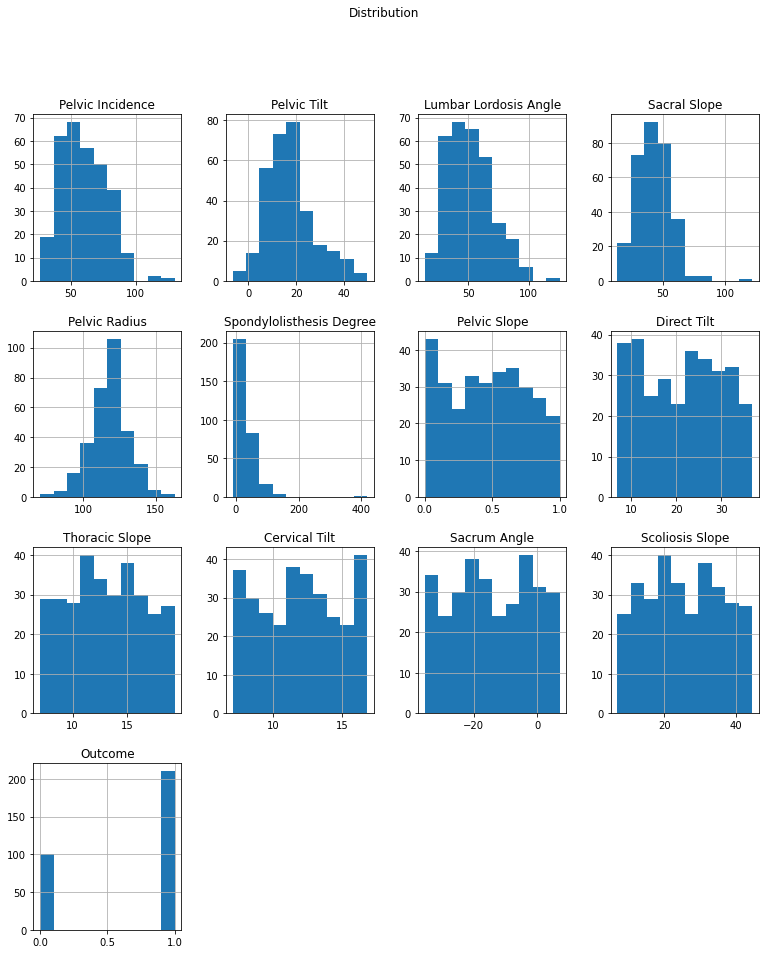

In [12]:
data.hist(figsize=[13,15])
plt.suptitle("Distribution")
plt.show()

<AxesSubplot:>

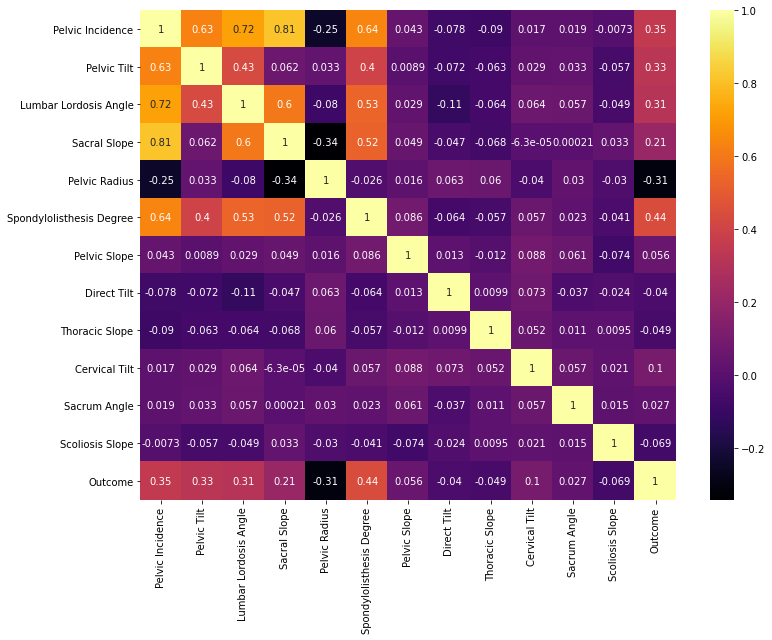

In [13]:
corr = data.corr()

# Set up the matplot figure
f, ax = plt.subplots(figsize=(12,9))

#Draw the heatmap using seaborn
sns.heatmap(corr, cmap='inferno', annot=True)

#Spondylolisthesis is graded by measuring how much of a vertebral body has slipped forward over the body beneath it

In [14]:
#In AS, spine becomes increasingly kyphotic and lordotic as lesions progress
'Pelvic Tilt','Lumbar Lordosis Angle', 'Thoracic Slope'

('Pelvic Tilt', 'Lumbar Lordosis Angle', 'Thoracic Slope')

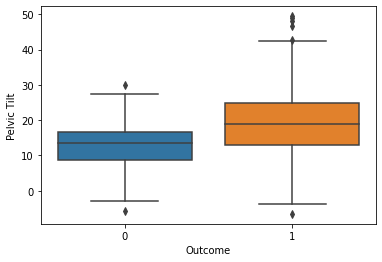

In [15]:
sns.boxplot(x='Outcome',y='Pelvic Tilt',data=data)
plt.show()

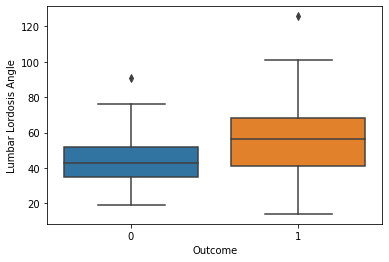

In [16]:
sns.boxplot(x='Outcome',y='Lumbar Lordosis Angle',data=data)
plt.show() 

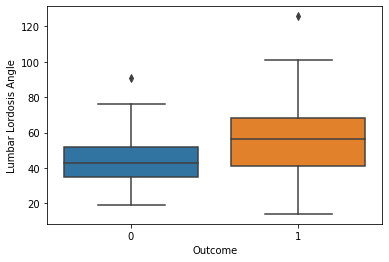

In [17]:
sns.boxplot(x='Outcome',y='Lumbar Lordosis Angle',data=data)
plt.show() 

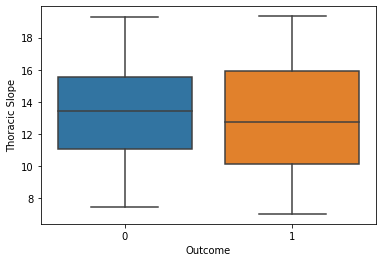

In [18]:
sns.boxplot(x='Outcome',y='Thoracic Slope',data=data)
plt.show() 

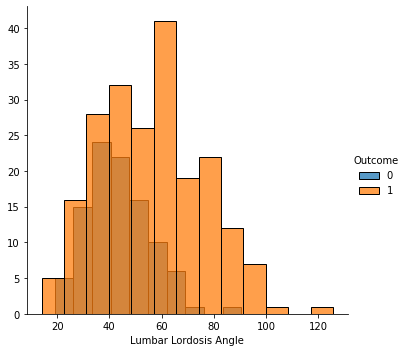

In [19]:
#Probability Density Function (PDF) of Lumbar Lordosis Angle. The x-axis represents the value ranges while the y-axis represents the percentage of data points for each target value. The colour weather back pain is present or not
sns.FacetGrid(data,hue="Outcome",height = 5).map(sns.histplot, 'Lumbar Lordosis Angle'). add_legend()
plt.show()



Biv`arate

<AxesSubplot:xlabel='Outcome', ylabel='Spondylolisthesis Degree'>

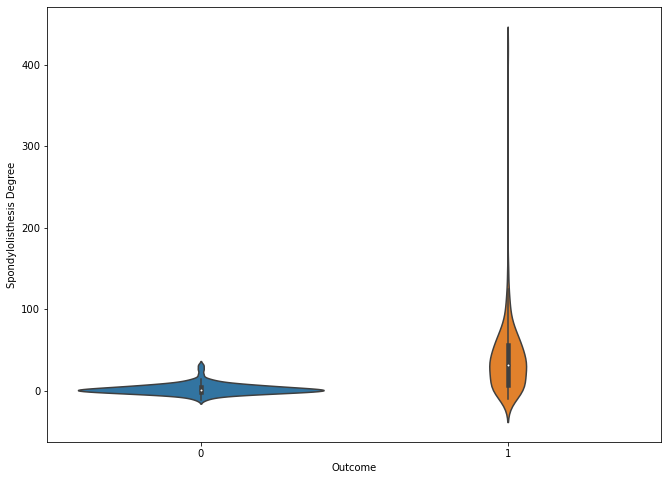

In [20]:
# Set up the matplot figure
f, ax = plt.subplots(figsize=(11,8))

sns.violinplot(y="Spondylolisthesis Degree",
    x="Outcome", data=data)

Bivariate Analysis

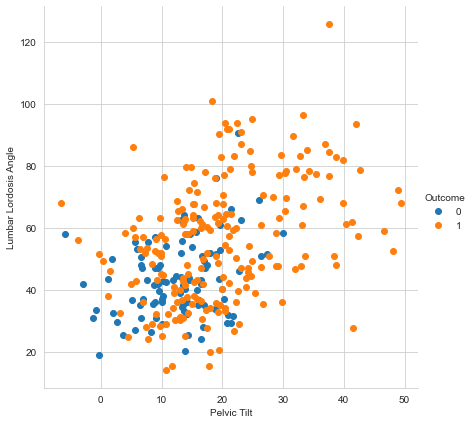

In [21]:
sns.set_style("whitegrid")
sns.FacetGrid(data, hue = "Outcome" , height = 6).map(plt.scatter,'Pelvic Tilt','Lumbar Lordosis Angle').add_legend()


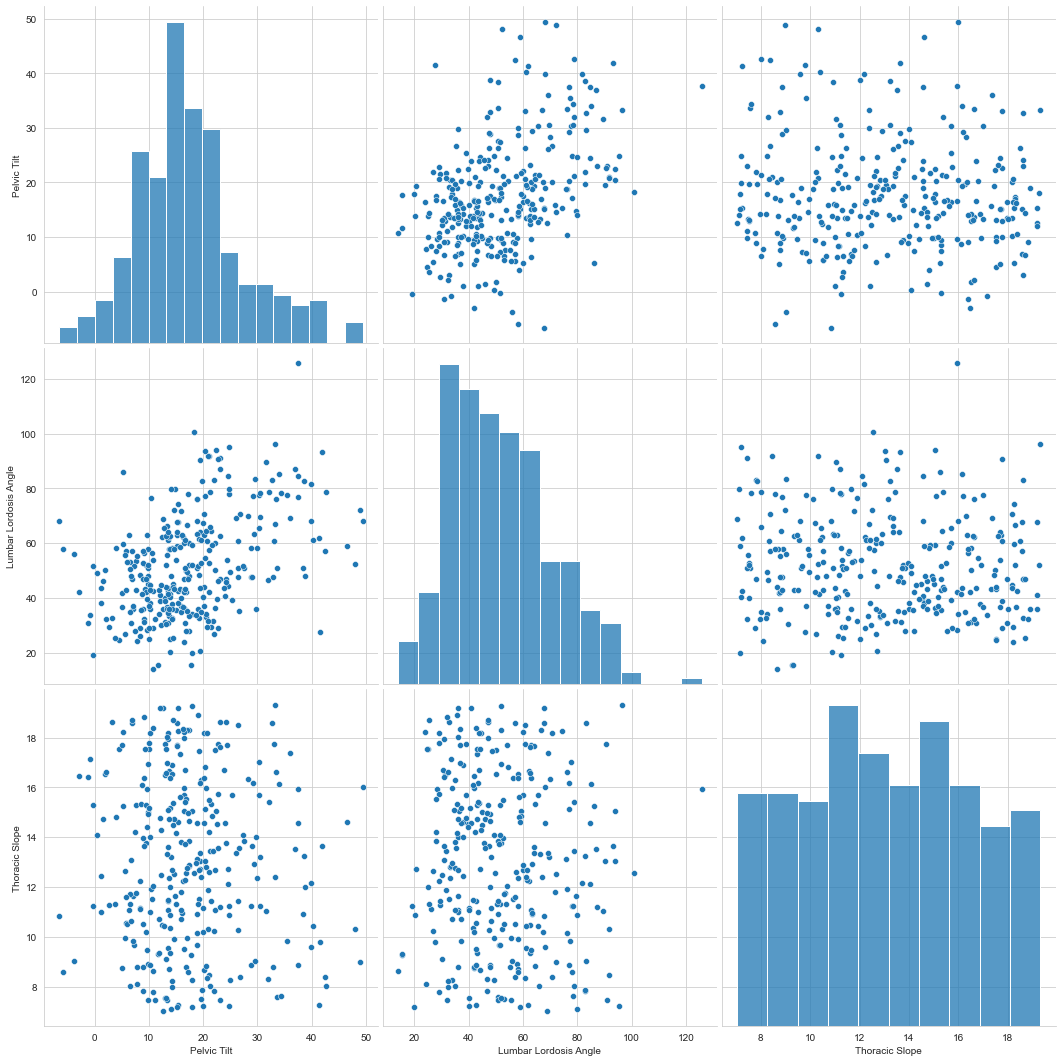

In [22]:
selected_features = data[['Pelvic Tilt','Lumbar Lordosis Angle', 'Thoracic Slope']]
sns.set_style("whitegrid")
sns.pairplot(selected_features, height = 5)
plt.show()



In [23]:
Spondylolisthesis_10_bin = pd.qcut(data['Spondylolisthesis Degree'], q=10)
#Spondylolisthesis_average_in_each_bin = Spondylolisthesis_10_bin.mean()

pd.crosstab(Spondylolisthesis_10_bin, data.Outcome)

Outcome,0,1
Spondylolisthesis Degree,,
"(-11.059, -2.098]",19,12
"(-2.098, 0.492]",24,7
"(0.492, 2.591]",19,12
"(2.591, 5.878]",17,14
"(5.878, 11.768]",15,16
"(11.768, 27.306]",5,26
"(27.306, 36.738]",1,30
"(36.738, 51.878]",0,31
"(51.878, 67.832]",0,31


Multivariate analysis - relationship between two or more cases 

In [24]:
data.describe()

,Pelvic Incidence,Pelvic Tilt,Lumbar Lordosis Angle,Sacral Slope,Pelvic Radius,Spondylolisthesis Degree,Pelvic Slope,Direct Tilt,Thoracic Slope,Cervical Tilt,Sacrum Angle,Scoliosis Slope,Outcome
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981,0.677419
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558,0.468220
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900,0.000000
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075,0.000000
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950,1.000000
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600,1.000000
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200,1.000000


In [25]:
df=data

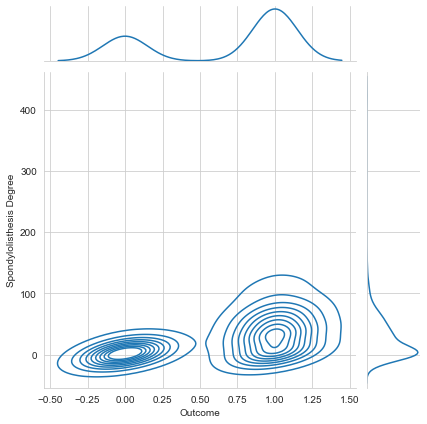

In [26]:
#In those without backpain, spondylolisthesis is less distributed, clustered around the mean, and generally lower. 
sns.jointplot(x = "Outcome", y = 'Spondylolisthesis Degree', data = data, kind = "kde")
plt.show()

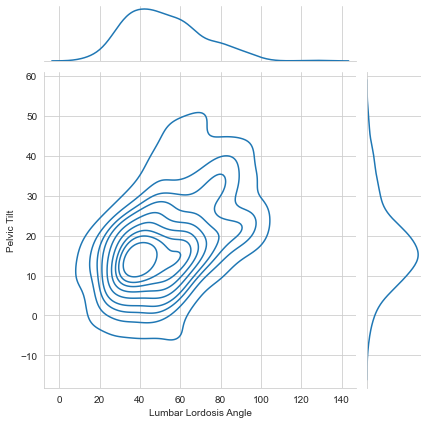

In [27]:
sns.jointplot(x = "Lumbar Lordosis Angle", y = 'Pelvic Tilt', data = data, kind = "kde")
plt.show()

PCA = Dimensionality reduction technique, extracts information from a many variables and projecting into few variables, preserving those which have more variation of the data and remove those with less
These components that explain variabce are a whole newly created set, rather than the features 

Enables us to select the most important variables to analyze and view.
Also speeds up machine learning algorithms 

In [28]:
from sklearn.preprocessing import StandardScaler

X = df.drop(['Outcome'], axis=1)
x = StandardScaler().fit_transform(X) # normalizing the features

In [52]:
from sklearn.decomposition import PCA
pca_spine = PCA(n_components=4)
principalComponents_spine = pca_spine.fit_transform(x)

In [55]:
principal_spine_Df = pd.DataFrame(data = principalComponents_spine
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4'])

principal_spine_Df.tail()

,principal component 1,principal component 2,principal component 3,principal component 4
305,-1.515413,-0.396219,-1.742900,-0.187261
306,-1.438371,-0.698632,-1.081566,-2.633439
307,-0.503339,0.497118,-1.466893,-0.980897
308,-1.570642,-0.561453,-0.376230,-2.067660
309,-2.451188,0.298315,1.472420,-1.948510


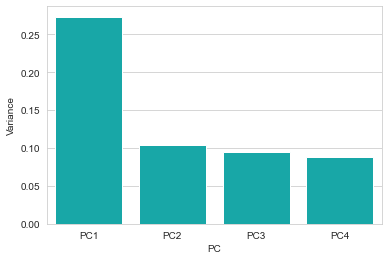

In [61]:
principal_spine_Df = pd.DataFrame({'Variance':pca_spine.explained_variance_ratio_,
              'PC':['PC1', 'PC2','PC3','PC4']})

principal_spine_Df.tail()

sns.barplot(x='PC',y="Variance", 
           data=principal_spine_Df, color="c");

In [11]:
import numpy as np

# convert to numpy.ndarray and dtype=float64 for optimal
array_train = np.asarray(training)
array_test = np.asarray(testing)
print(array_train.shape)
print(array_test.shape)

#   Convert each pandas DataFrame object into a numpy array object. 
array_XTrain, array_XTest, array_ytrain, array_ytest = np.asarray(X_train), np.asarray(X_test), np.asarray(y_train), np.asarray(y_test)

<h1> Employing Support Vector Machine as a Classifier - 85% </h1>

In [12]:
#    Import Necessary Packages
from sklearn import svm
from sklearn.metrics import accuracy_score

#   Instantiate the classifier
clf = svm.SVC(kernel='linear')

#   Fit the model to the training data
clf.fit(array_XTrain, array_ytrain)

#   Generate a prediction and store it in 'pred'
pred = clf.predict(array_XTest)

#   Print the accuracy score/percent correct
svmscore = accuracy_score(array_ytest, pred)
print("Support Vector Machines are ", svmscore*100, "accurate")


<h1> That's it! </h1>
<p>~85% prediction accuracy with Support Vector Machines!  To increase the accuracy of the model, feature engineering is a suitable solution - as well as creating new variables based on domain knowledge.</p>

<h2> Next Steps</h2>
<li> Since we've done no feature engineering or any parameter tuning, there is a lot of room for improvement. </li>
<li>Specifically, an ANN has been shown to acheive a 93% accuracy score when predicting low back pain from this study</li>


In [13]:
from keras.models import Sequential
from keras.layers import Dense, Activation
import keras

In [14]:
print(array_XTrain.shape)
print(array_ytrain.shape)

In [15]:
#  Define our model
model = Sequential()
model.add(Dense(32, activation='tanh', input_dim=12))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

one_hot_labels = keras.utils.to_categorical(array_ytrain, num_classes=10)

history = model.fit(array_XTrain, one_hot_labels,epochs=1000, batch_size=30)
weights = model.layers[0].get_weights()[0]
biases = model.layers[0].get_weights()[1]

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'])
plt.xlabel("Epochs (Batches)")
plt.ylabel("Loss")
plt.title("Training an Artificial Neural Net")

<h3>A Little Note About Input Shapes</h3>

The input dimension on the input layer of a Neural Net (NN) seems to always cause me issues. It begins with me thinking that dimensions refer to the length of the input data. Although I still want to confirm, this is a misconception on my part. Input dimension (or shape) refers to the number of fields in the input data. 

"Fields", in this case, refers to the variables within the input data. The number of Fields, Features or Dimension should be the value of the input shape. 

<p> After we've set up the model's parameters we must choose both a loss function and define the learning rate. An analogy to understand learning rate is to imagine a bowl. To find the lowest (or highest) point of the bowl, you take a small 'leap' from your current position to a random location. 

* If the jump is too large, you risk making too large a step and stepping over the most optimal position. 
* If the jump is too small, you risk increasing the computational cost. I believe the standard is to set it to 0.1 as a 'default'. 